In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import log_loss
import itertools
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


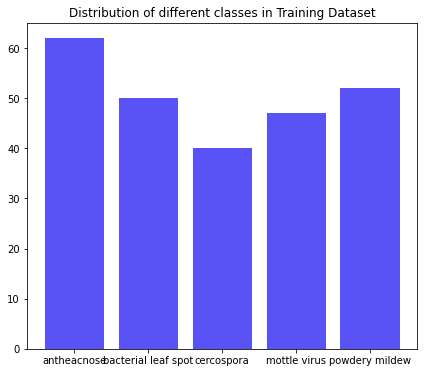

In [18]:
image_folder = ['antheacnose','bacterial leaf spot','cercospora','mottle virus','powdery mildew']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Dataset/Training_Data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(7, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center',color ='#5953f5')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['antheacnose','bacterial leaf spot','cercospora','mottle virus','powdery mildew']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Dataset/Training_Data/'+i+'/'))))

Training antheacnose images are: 62
Training bacterial leaf spot images are: 50
Training cercospora images are: 40
Training mottle virus images are: 47
Training powdery mildew images are: 52


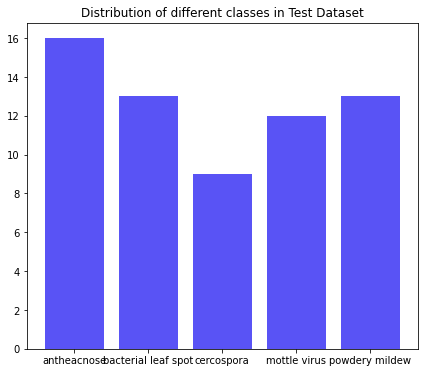

In [19]:
image_folder = ['antheacnose','bacterial leaf spot','cercospora','mottle virus','powdery mildew'];
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Dataset/Test_Data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(7, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center', color='#5953f5')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

In [ ]:
for i in ['antheacnose','bacterial leaf spot','cercospora','mottle virus','powdery mildew']:
    print('Test {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Dataset/Test_Data/'+i+'/'))))

Test antheacnose images are: 16
Test bacterial leaf spot images are: 13
Test cercospora images are: 9
Test mottle virus images are: 12
Test powdery mildew images are: 13


In [ ]:
img_width=224; img_height=224

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Dataset/Training_Data/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 251 images belonging to 5 classes.


In [ ]:
TEST_DIR = '/content/drive/MyDrive/Dataset/Test_Data/'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=1,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 62 images belonging to 5 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = False)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'), 
    Dropout(0.20),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),#why?
    Dense(5, activation='softmax')
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 128)      

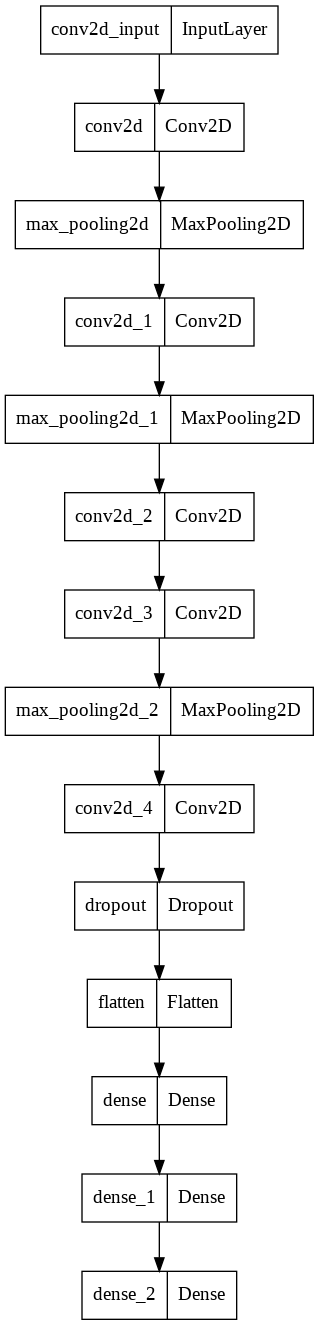

In [ ]:
plot_model(model, to_file='/content/drive/MyDrive/Dataset/ModelDenseNet.png')

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(factor=0.2, min_lr=0.01)

In [ ]:
history = model.fit(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=test_generator,
                              callbacks = [learning_rate_reduction]
                    )

Epoch 1/100
8/8 [==============================] - 57s 7s/step - loss: 2.4511 - accuracy: 0.2032 - val_loss: 1.6204 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 2/100
8/8 [==============================] - 5s 661ms/step - loss: 1.6155 - accuracy: 0.1952 - val_loss: 1.5971 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 3/100
8/8 [==============================] - 5s 686ms/step - loss: 1.6217 - accuracy: 0.2510 - val_loss: 1.6047 - val_accuracy: 0.2903 - lr: 0.0010
Epoch 4/100
8/8 [==============================] - 5s 676ms/step - loss: 1.6097 - accuracy: 0.1753 - val_loss: 1.6041 - val_accuracy: 0.2258 - lr: 0.0010
Epoch 5/100
8/8 [==============================] - 6s 700ms/step - loss: 1.6065 - accuracy: 0.2151 - val_loss: 1.5921 - val_accuracy: 0.3065 - lr: 0.0010
Epoch 6/100
8/8 [==============================] - 6s 696ms/step - loss: 1.5969 - accuracy: 0.2470 - val_loss: 1.5756 - val_accuracy: 0.2742 - lr: 0.0010
Epoch 7/100
8/8 [==============================] - 5s 677ms/step - loss: 1.594

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/KalCNNArch.h5')

In [ ]:
print("Accuracy of the model is-" , model.evaluate(train_generator)[1]*100, "%")
print("loss of the model is-" , model.evaluate(train_generator)[0])

8/8 [==============================] - 5s 586ms/step - loss: 0.2334 - accuracy: 0.9203
Accuracy of the model is- 92.03187227249146 %
8/8 [==============================] - 5s 577ms/step - loss: 0.2409 - accuracy: 0.9044
loss of the model is- 0.2409195750951767


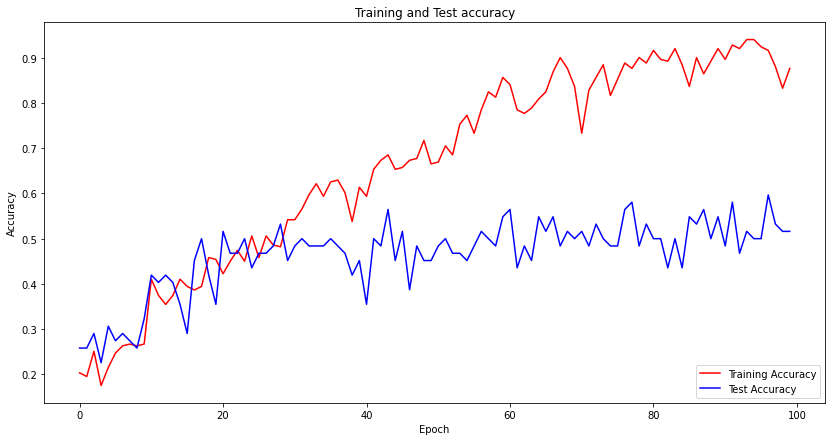

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Test Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test accuracy')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and Test loss')

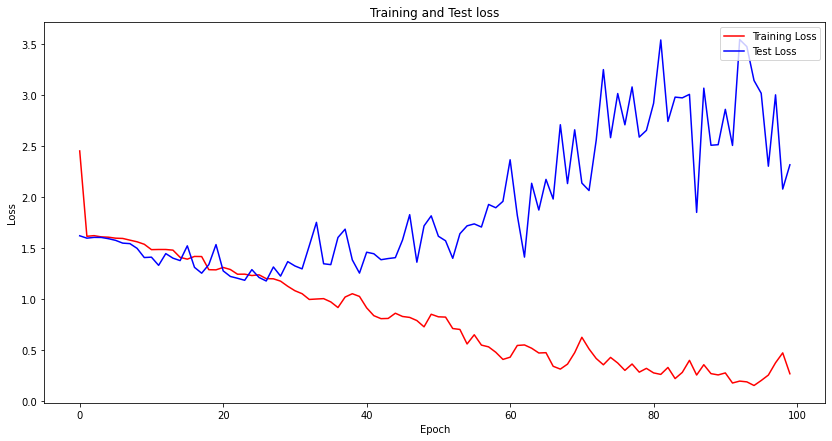

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Test Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test loss')